\textbf{LABORATORIUM NR 7 - DRZEWA DECYZYJNE}

Na dzisiejszych zajęciach zapoznamy się z drzewami decyzyjnymi, czyli jedną z bardziej popularnych metod uczenia nadzorowanego. Wykorzystamy do tego zbiór danych MNIST, czyli zbiór zawierający ręcznie zapisane cyfry 0-9.

Najpierw pobierzemy odpowiednie biblioteki.

In [19]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

Pliki .gz wypakować (np. za pomocą darmowego programu 7-Zip) do folderu, w którym znajduje się Jupyter Notebook. Pliki po wypakowaniu powinny mieć te same nazwy.

In [20]:
X_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

Zobaczmy, jak wyglądają przykładowe cyfry ze zbioru MNIST.

Rozmiar pojedynczego obrazka wynosi: (28, 28)


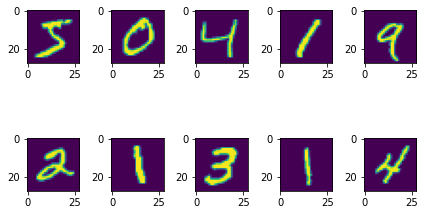

In [21]:
%config InlineBackend.figure_format = 'svg'
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.array(X_train[i]))
plt.tight_layout()
print(f'Rozmiar pojedynczego obrazka wynosi: {X_train[i].shape}')

Przekonwertujmy dane na tablice Numpy.

In [22]:
X_train = np.reshape(X_train, (len(X_train), -1))
y_train = np.reshape(y_train, (len(y_train), -1))
X_test = np.reshape(X_test, (len(X_test), -1))
y_test = np.reshape(y_test, (len(y_test), -1))

Wytrenujmy klasyfikator na zbiorze MNIST, a następnie wyświetlmy mapę, która odpowie nam na pytanie, jakie piksele były najistotniejsze przy podejmowaniu decyzji przez drzewo.

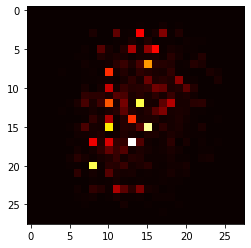

In [23]:
tree_classifier = tree.DecisionTreeClassifier(random_state=0)
tree_classifier.fit(X_train, y_train)
importances = np.reshape(tree_classifier.feature_importances_, (28, 28))
plt.imshow(importances, cmap='hot')

Sprawdźmy dokładność klasyfikacji dla zbioru treningowego i testowego.

In [24]:
train_score = tree_classifier.score(X_train, y_train)
test_score = tree_classifier.score(X_test, y_test)
test_prediction = tree_classifier.predict(X_test)
print(f'Dokładność klasyfikacji na zbiorze treningowym wynosi: {train_score}, zaś na zbiorze testowym: {test_score}.')

Dokładność klasyfikacji na zbiorze treningowym wynosi: 1.0, zaś na zbiorze testowym: 0.8781.


Stwórzmy teraz macierz pomyłek (ang. confusion matrix), czyli macierz, w której na przekątnej znajdują się prawidłowo zaklasyfikowane cyfry, czyli w pozycji $(i, i)$ znajduje się ilość cyfr należących do klasy $i$, które zostały przydzielone właściwie do klasy $i$. Z kolei w miejscach $(i, j)$, gdzie $i \neq j$ znajduje się ilość cyfr należących do klasy $i$, a przydzielonych błędnie do klasy $j$. Czyli na przykład w indeksie $(0, 2)$ znajduje się liczba zer, które zostały uznane przez algorytm za dwójki.

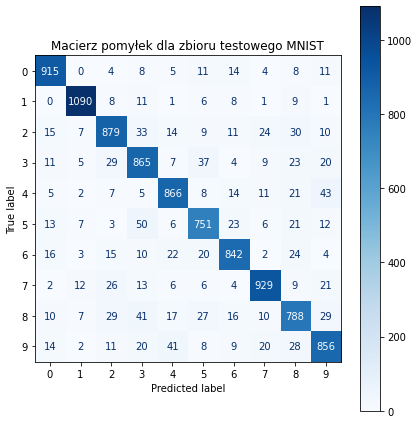

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
normalize = None  # możliwości: 'true', None
values = '.2f' if normalize == 'true' else '.4g'
plot = plot_confusion_matrix(tree_classifier, X_test, y_test,
                             normalize=normalize,  # wartości w skali 0-1
                             display_labels=[i for i in range(10)], # etykiety zwiazane z cyframi
                             values_format=values, # format wyswietlania cyfr
                             ax=ax, # zwiekszenie rozmiarow obrazka
                             cmap=plt.cm.Blues)
plot.ax_.set_title('Macierz pomyłek dla zbioru testowego MNIST')
plt.tight_layout()

Przetestujmy, jak będzie działało drzewo, gdy będziemy ustawiać mu limit głębokości. Zbyt głębokie drzewo zwiększa ryzyko przetrenowania (ang. overfitting). Wówczas spada nam dokładność klasyfikacji na zbiorze testowym, pomimo wzrostu na zbiorze treningowym.

In [26]:
classifiers, scores_train, scores_test = [], [], []
depths = np.arange(2, 30, 3)  # tablica od 2 do 30, gdzie każda kolejna wartość jest większa o 3 od poprzedniej
for depth in depths:
    classifier = tree.DecisionTreeClassifier(random_state=0,
                                             max_depth=depth)
    classifier.fit(X_train, y_train)
    classifiers.append(classifier)
    scores_train.append(classifier.score(X_train, y_train))
    scores_test.append(classifier.score(X_test, y_test))

In [27]:
for i in range(len(scores_train)):
    print(f'drzewo o maksymalnej głębokości {depths[i]}: dokładność na zbiorze treningowym: {scores_train[i]:.4f}, ',
          f'dokładność na zbiorze testowym: {scores_test[i]:.4f}')

drzewo o maksymalnej głębokości 2: dokładność na zbiorze treningowym: 0.3418,  dokładność na zbiorze testowym: 0.3447
drzewo o maksymalnej głębokości 5: dokładność na zbiorze treningowym: 0.6723,  dokładność na zbiorze testowym: 0.6747
drzewo o maksymalnej głębokości 8: dokładność na zbiorze treningowym: 0.8263,  dokładność na zbiorze testowym: 0.8186
drzewo o maksymalnej głębokości 11: dokładność na zbiorze treningowym: 0.9276,  dokładność na zbiorze testowym: 0.8748
drzewo o maksymalnej głębokości 14: dokładność na zbiorze treningowym: 0.9770,  dokładność na zbiorze testowym: 0.8822
drzewo o maksymalnej głębokości 17: dokładność na zbiorze treningowym: 0.9910,  dokładność na zbiorze testowym: 0.8822
drzewo o maksymalnej głębokości 20: dokładność na zbiorze treningowym: 0.9950,  dokładność na zbiorze testowym: 0.8796
drzewo o maksymalnej głębokości 23: dokładność na zbiorze treningowym: 0.9968,  dokładność na zbiorze testowym: 0.8800
drzewo o maksymalnej głębokości 26: dokładność na z

$\mathbf{ZADANIE: }$ Zbiór danych Iris jest wielowymiarowym zbiorem wprowadzonym przez Ronalda Fishera. Pozwala on sklasyfikować gatunki kosaćca: Iris setosa, Iris versicolor, Iris virginica w zależności od długości i szerokości płatka, a także długości i szerokości kielicha (kwiatu). Dokonać podziału zbioru Iris na zbiór treningowy i testowy w proporcjach 70%/30%. Przeprowadzić klasyfikację z argumentem random_state=2. Za pomocą funkcji tree.plot_tree() utworzyć rysunek drzewa i zapisać je do pliku .PNG lub .PDF. Wczytanie zbioru jest najprościej możliwe w sposób następujący:

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target